### Example 5.5: Use von Neumann rejection to sample points in the interval $[0,1]$, distributed as $w(x) = \frac{6}{5} ( 1 - \frac{1}{2} x^2)$. Plot a histogram of the points and verify that they are indeed distributed according to $w(x)$. Evaluate the integral $I = \int_0^1 \frac{1}{1+x^2} \mathrm{d} x$ and its uncertainty with these points. 

In [24]:
import math
import random # we need random numbers for the Monte Carlo method!
import numpy as np

# first let's use the von Neumann rejection to obtain a sample of 1E4 points according to w(x):
# let's write a function that returns a list of N points distributed according to w(x)
def vonNeumann(wfunc, wpfunc, N):
    """Uses the von Neumann rejection method to generate a sample of N points distributed according to wfunc, with the w' being called wpfunc"""
    n = 0 # counter of accepted points
    points = []
    while(n < N): # stop once you have accepted N points:
        # first pick a random point in [0,1]:
        xi = random.random()
        # then calculate wfunc(x)/wpfunc(x) and compare to a random number eta
        eta = random.random()
        if eta < wfunc(xi)/wpfunc(xi): # if eta < w(xi)/w'(xi) then accept the point
            n = n + 1 # increment the counter of accepted points 
            points.append(xi) # append it to the list
        else: # otherwise reject and restart
            continue
    return points

# now let's write a Monte Carlo integration routine that does the integral using a given set of points {xi}
# this is almost identical to our previous mc integration routine, but now the points are pre-determined 
def mcint_vonNeumann(func, wfunc, points):
    sumf = 0 # we will use this variable for the sum of f(x_i)
    sumfsq = 0 # and this one for the sum of f(x_i)^2, used in the error calculation
    for xi in points:
        sumf = sumf + func(xi)/wfunc(xi)
        sumfsq = sumfsq + (func(xi)/wfunc(xi))**2 
    # now calculate the average value of f (i.e. the integral):
    I = sumf/N
    # and the error: 
    sigmaIsq = (1/N) * ( (1/N) * sumfsq - I**2 ) # this is the variance (i.e. the error squared)
    sigmaI = math.sqrt(sigmaIsq) # this is the actual error
    return I, sigmaI # return the integral and its error

# define the function to be integrated:
def f(x):
    return 1/(1+x**2)

# define the weight function that we wish to use for the integration:
def w(x): 
    return (6/5) * (1- np.power(x,2)/2)

# define the w'(x) function. In this case we choose the maxim value of w(x) in [0,1] = 6/5
def wp(x):
    return (6/5) 

# Let's first get the points and plot them: 
N = 1E4
points = vonNeumann(w, wp, N)
print('Number of points generated=', len(points))

Number of points generated= 10000


Let's now plot the points and their expected distribution: 

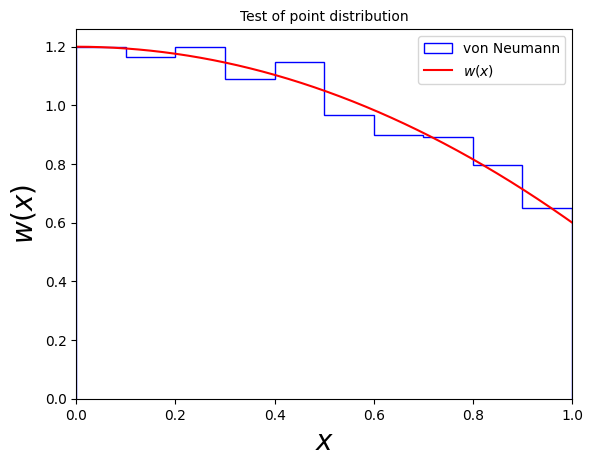

In [19]:
import matplotlib.pyplot as plt # import matplotlib, a conventional module name is plt
import numpy as np

fig, ax = plt.subplots() # create the elements required for matplotlib. This creates a figure containing a single axes.

# set the labels and titles:
ax.set_xlabel(r'$x$', fontsize=20) # set the x label
ax.set_ylabel(r'$w(x)$', fontsize=20) # set the y label
ax.set_title('Test of point distribution', fontsize=10) # set the title 

# set the x and y limits:
ax.set_xlim(0, 1)

x = np.linspace(0,1,1000)
wx = w(x)

# make one-dimensional plots using the above arrays, add a custom label, linestyles and colors:
ax.hist(points, color='blue', density=True, fill=False, histtype='step', label="von Neumann") 

# plot the actual distribution for comparison: 
ax.plot(x, wx, color='red', label="$w(x)$")

# construct the legend:
ax.legend(loc='upper right')  # Add a legend

plt.show() # show the plot here

And let's perform the Monte Carlo integration using these points: 

In [26]:
Int, Err = mcint_vonNeumann(f, w, points)
print("The integral with the von Neumann sample=", Int, "+-", Err)

The integral with the von Neumann sample= 0.7852921873776357 +- 0.00032730078253789563
